<a href="https://colab.research.google.com/github/riyautekar25/Data-Science/blob/main/customer_churn_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing the dependencies

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

2. Data loading and understanding

In [89]:
#load the csv data to a pandas dataframe
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [90]:
df.shape

(7043, 21)

In [91]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
pd.set_option('display.max_columns', None)

In [93]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [95]:
# dropping customerID column as it is not required for modelling
df = df.drop(columns=['customerID'])

In [96]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [97]:
print(df['gender'].unique())

['Female' 'Male']


In [98]:
# printing unique values in all hte columns
numerical_features_list = ['tenure','MonthlyCharges','totalcharges']
for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique()) # so we are printing unique values only for categorical features
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [99]:
#df['Totalcharges'] = df['Totalcharges'].astype(float)

In [100]:
df[df['TotalCharges']==" "] # so here we are filtering those entries taht have no value (an emoty space) in totalcharges column, so that we can remove them and then do the conversion to float type

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [101]:
len(df[df['TotalCharges']==" "]) #so we have 11 such rows

11

There could eb a reson that the totalCharges are zero, for example if we look at the tenure of this rows, the tenure is 0 so if the customer is new and havent used the service for 1 year, then they will not pay the totalCharges, so we can suimply multiply the tenure and get the totalcharges value filled.

In [102]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0.0")

In [103]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [105]:
# checking teh class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights:**
1. customer ID is removed as it is not required for modeling
2. No missing values in the dataset
3. Missing values in the TotalCharges column were replaceed with 0
4. Class imbalance identified in the target (more No values then yes)

3. Exploratory Data Analysis (EDA)

In [106]:
df.shape

(7043, 20)

In [107]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [108]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [109]:
df.describe() #provides descriptive analysis of data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Numerical feature - analysis

understand distribution of the numerical features

In [110]:
def plot_histogram(df,column_names):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_names],kde=True)
  plt.title(f"distribution of {column_names}")
  # Calculate the means and median values for the columns
  col_mean = df[column_names].mean()
  col_median = df[column_names].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color='red', linestyle='--',label="Mean")
  plt.axvline(col_median, color='green', linestyle='-',label="Median")

  plt.legend()
  plt.show()

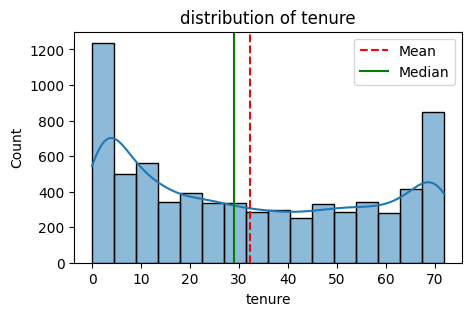

In [111]:
plot_histogram(df,'tenure')

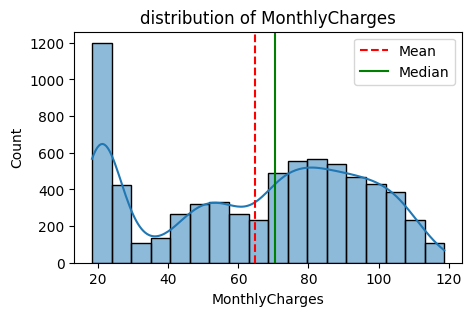

In [112]:
plot_histogram(df,'MonthlyCharges')

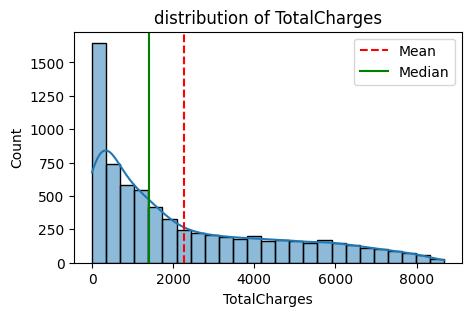

In [113]:
plot_histogram(df,'TotalCharges')

Box plot for numerical features

In [114]:
def plot_boxplot(df,column_names):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_names])
  plt.title(f"Boxplot of {column_names}")
  plt.ylabel(column_names)
  plt.show()

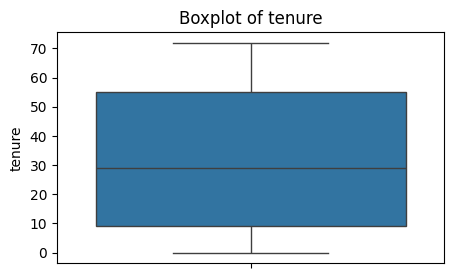

In [115]:
plot_boxplot(df,'tenure')

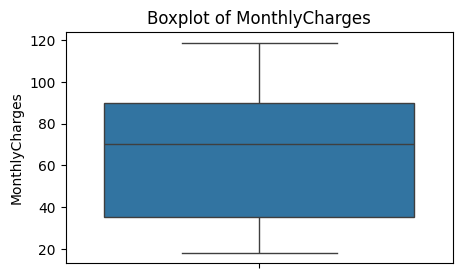

In [116]:
plot_boxplot(df,'MonthlyCharges')

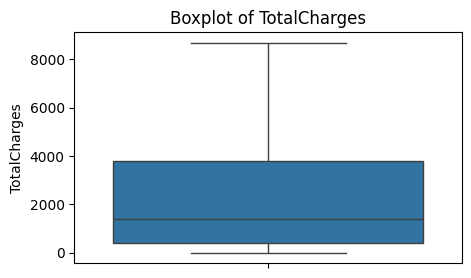

In [117]:
plot_boxplot(df,'TotalCharges')

Correlation heatmap for numerical columns

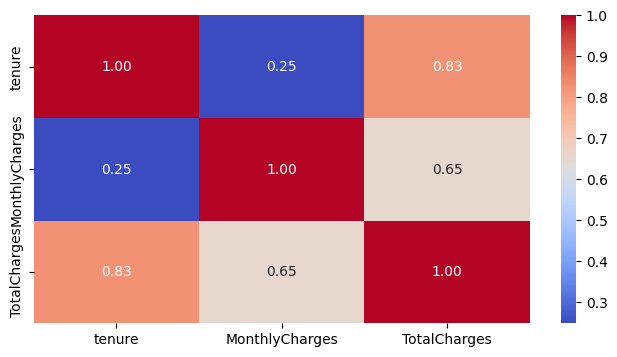

In [118]:
#correlation matrix - heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Categorical features analysis

In [119]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Count plot for categorical columns

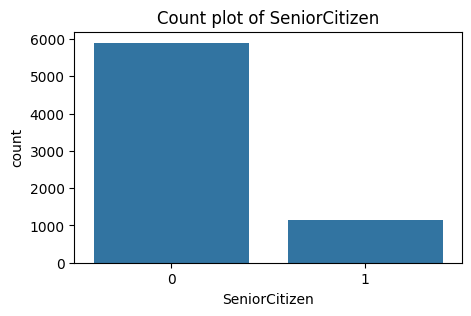

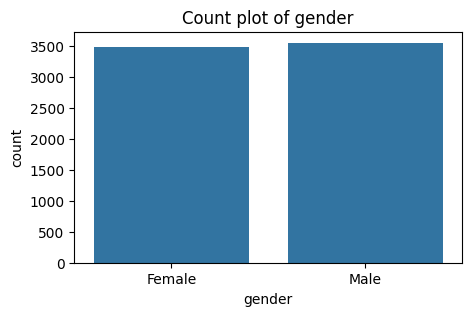

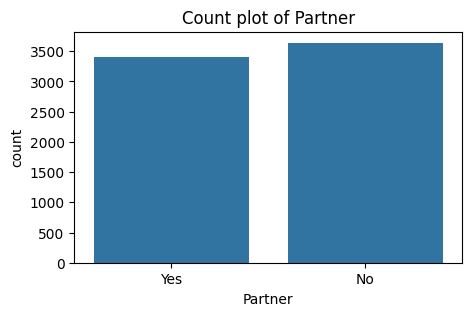

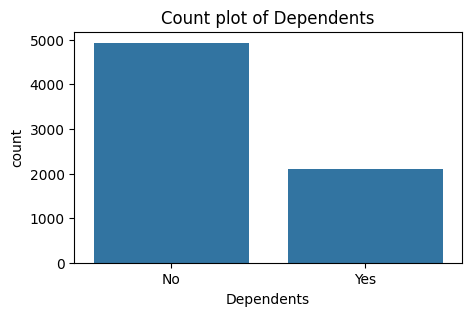

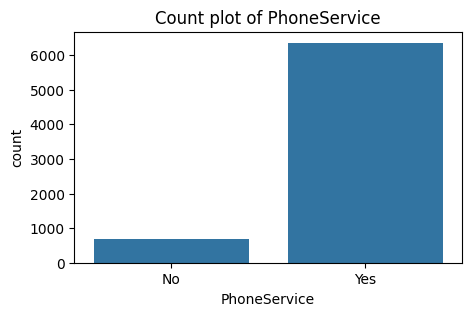

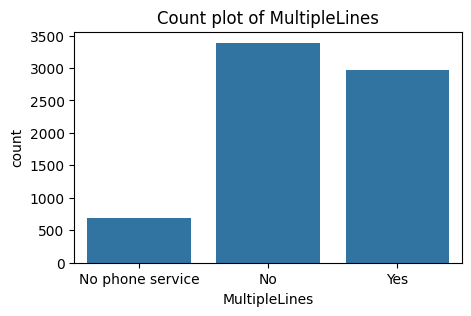

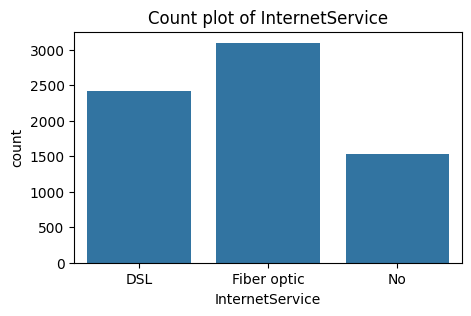

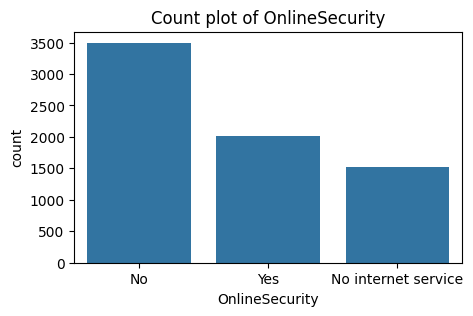

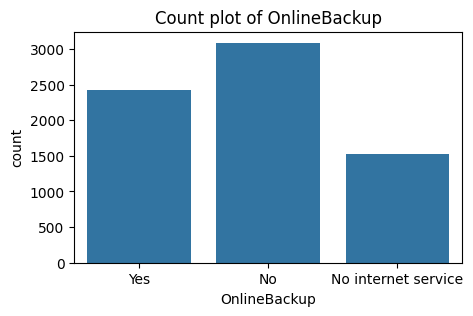

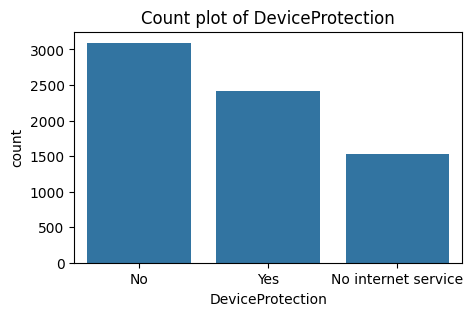

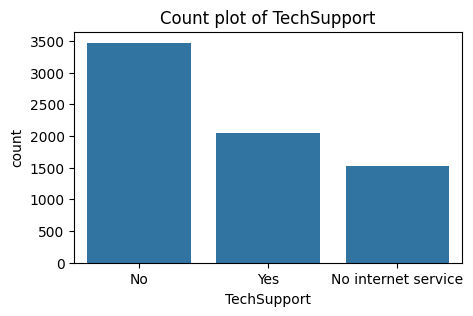

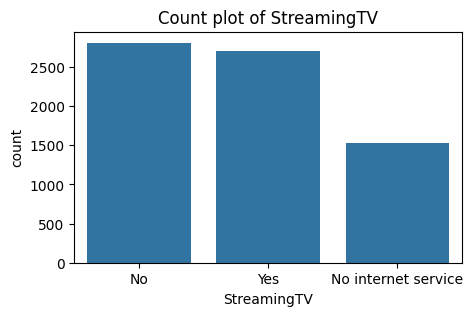

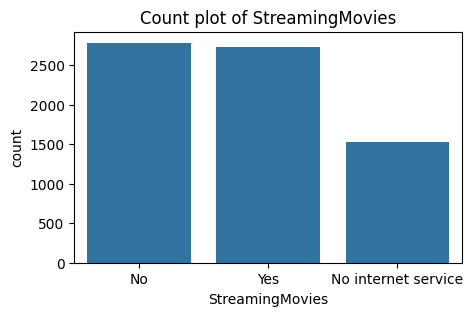

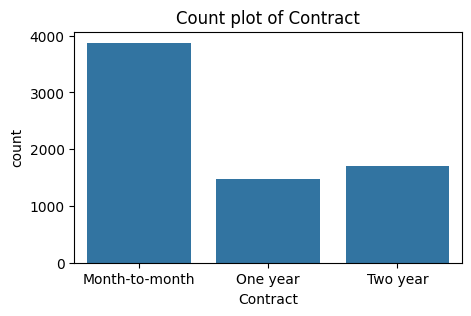

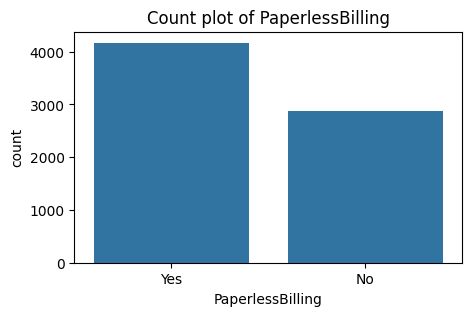

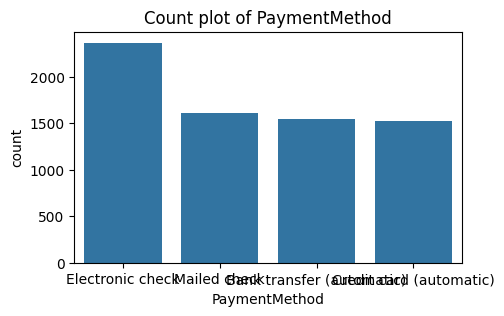

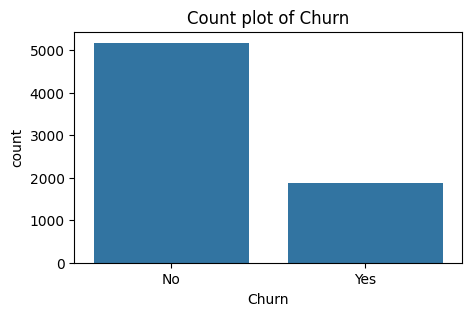

In [121]:
object_columns = df.select_dtypes(include='object').columns.to_list()
object_columns=["SeniorCitizen"]+object_columns

for col in object_columns:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"Count plot of {col}")
  plt.show()

4. Data Preprocessing

In [122]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Label Encoding of target column

In [123]:
df['Churn'] = df['Churn'].replace({"Yes":1,"No":0})

<ipython-input-123-17c77b8740ed>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"Yes":1,"No":0})


In [124]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [125]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


Label encoding of categorical column

In [138]:
# Label encoding of categorical column

#identifying columns with object datatype
object_columns = df.select_dtypes(include='object').columns
print(object_columns)

import pickle

#initialize a dictionary to save THE ENCODERS
encoders = {}

#apply label encoding and store the encoders
# Fit the encoders on the entire dataset before splitting
for column in object_columns:
  label_encoder = LabelEncoder()
  # Fit on the entire column to capture all possible labels
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

#save the encoders to a pickle file
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

df.head(3)

# Training and test data split

# splitting the features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

#split training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Synthetic Minority Oversampling TEchnique (SMOTE)

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print(y_train_smote.shape)

print(y_train_smote.value_counts())

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
(8276,)
Churn
0    4138
1    4138
Name: count, dtype: int64


training with default hyperparameters

In [139]:
#dictinary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

Random forest gives the highest accuracy compared to other models with default parameters

In [142]:
# rfc = RandomForestClassifier(random_state=42)

In [143]:
# dictionary to store the cross validation results
cv_results = {}
# Variable to store the best performing model after fitting
best_model = None
best_score = 0

for model_name, model in models.items():
  # print(model_name)
  # print(model)
  # print("-"*50)
  print(f"Training {model_name} with deafult parameters")
  scores = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_results[model_name] = scores
  mean_score = np.mean(scores)
  print(f"{model_name} cross-validation accuracy: {mean_score:.2f}")
  print("-"*50)

  # Fit the model to the training data
  model.fit(X_train_smote, y_train_smote)

  # Keep track of the best model based on mean cross-validation accuracy
  if mean_score > best_score:
      best_score = mean_score
      best_model = model

# After the loop, best_model will hold the fitted model with the highest CV accuracy.
# Now, save the best_model
model_data = {"model": best_model, "features_name": X.columns.to_list()}

with open ('customer_churn_model.pkl',"wb") as f:
  pickle.dump(model_data,f)

Training Decision Tree with deafult parameters
Decision Tree cross-validation accuracy: 0.78
--------------------------------------------------
Training Random Forest with deafult parameters
Random Forest cross-validation accuracy: 0.84
--------------------------------------------------
Training XGBoost with deafult parameters
XGBoost cross-validation accuracy: 0.83
--------------------------------------------------


6. model evaluation

In [144]:
#evaluate on test data
y_test_pred = model.predict(X_test)

print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.7806955287437899
Confusion Matrix:
 [[885 151]
 [158 215]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



7. load the saved model and build a Predictive system

In [145]:
 #load teh saved model and the encoders

with open("customer_churn_model.pkl","rb") as f:
   model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_name"]


In [146]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [147]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [148]:
input_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}

input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl","rb") as f:
  encoders = pickle.load(f)

# encode categorical features using the saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

In [149]:
input_data_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [150]:
#make a prediction

prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)
print(prediction)

#results
print(f"Prediction: {'Churn' if prediction[0]==1 else 'No churn'}:")
print(f"Prediction probability: {pred_prob}")

[0]
Prediction: No churn:
Prediction probability: [[0.78 0.22]]
